## Vetores 

O que são vetores?

Podemos afirmar que objetos que podem ser somados ou multiplicados por um escalar para forma novos vetores.

Exemplo 1:
Se tivermos informações sobre pessoas, como altura, peso e idade, podemos representar esses dados como um vetor tridimensional:

[altura, peso, idade]. Dessa forma, podemos visualizar um vetor tridimensional como uma lista de três números.

In [3]:
from typing import List

Vector = List[float]

In [4]:
altura_peso_idade = [70,170,40]

Se eu tenho dois vetores v e w, caso os vetores tenham o mesmo tamanho teremos um vetor que o primeiro elemento será v[0] + w[0], o segundo será v[1] e w[1]... Logo sabemos que não podemos somar vetores com tamanhos diferentes.

Conseguimos realizar operação utilizando o zip para compactar os vetores e aplicar em uma list comprehension para adicionar os elemento.

In [52]:
#Ex1

def add(v: Vector, w:Vector) -> Vector:
    """Soma os elementos"""
    assert len(v) == len(w)
    return [v_i + w_i for v_i,w_i in zip(v,w)]

add([2,3],[3,4])

[5, 7]

In [53]:
#Ex2

def add(v: Vector, w:Vector) -> Vector:
    """Subtrai os elementos"""
    assert len(v) == len(w)
    return [v_i - w_i for v_i,w_i in zip(v,w)]

add([2,3],[3,4])

[-1, -1]

As vezes será necessário somar uma lista de vetores por componentes. Onde será necessário criar um vetor onde o primeiro elemento será a soma de todos os primeiros elementos e assim sucessivamente.

In [54]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Soma de todos os elementos"""
    assert vectors, "nenhum vetor fornecido"
    
    num_elementos = len(vectors[0])
    assert all(len(v) == num_elementos for v in vectors)
    return [sum(vector[i] for vector in vectors) for i in range(num_elementos)]

In [55]:
 vector_sum([[1,2], [3,4],[5,6],[7,8]])

[16, 20]

Podemos também multiplicar os vetores por um escalar, a operação é simples, basta multiplicar cada elemento do vetor pelo escalar.

In [56]:
def mult_escalar(c: float, v: Vector) -> Vector:
    """Multiplicação de um vetor por um escalar"""
    return[ c*v for v in v]
mult_escalar(2, [8,9,10])

[16, 18, 20]

Podemos também fazer a média dos valores da lista de vetores.

In [57]:
def avg_vetores (v: List[Vector]) -> Vector:
    """Média dos valores que estão na lista dos vetores"""
    n = len(v)
    return [sum(v_i)/n for v_i in v]

In [58]:
avg_vetores([[2, 4, 6], [1, 3, 5], [3, 6, 9]])


[4.0, 3.0, 6.0]

O produto escalar é uma operação matemática que combina dois vetores para produzir um único valor. Ele é usado para medir a relação entre dois vetores e é definido como a soma dos produtos dos elementos correspondentes dos vetores. O resultado do produto escalar é um número real.


In [60]:
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len (w)
    return sum(v_i * w_i for v_i,w_i in zip(v,w))
dot([1,1],[2,2])

4

In [61]:
def sum_squares(v: Vector) -> float:
    return dot(v,v)
sum_squares([2,2])

8

Podemos utilizar a soma dos quadrados para pegar a magnitude do vetor, ou seja, pegar seu comprimento. 

In [62]:
import math
def magnitude(v: Vector) -> float:
    return math.sqrt(sum_squares(v))
magnitude([3, 4])

5.0

Definindo o comprimento do vetor, conseguimos pegar a distância entre os dois vetores.

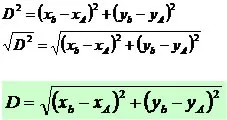

In [41]:
from PIL import Image
foto = Image.open('formula.png')
foto

In [69]:
import math

def squared_distance(v: Vector, w: Vector) -> float:
    return sum_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v, w))

def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))
magnitude([1,2])

2.23606797749979

## Matrizes

De forma simples podemos definir uma matriz como uma "tabela" de números organizadas em linhas e colunas. Cada número de uma matriz é chamado de elemento.

Representamos matrizes como listas de listas, onde as listas internas terão o mesmo tamanho e vão representar as linhas da nossa matriz. Se temos por exemplo uma matriz A, então A[i][j] é o elemento na linha i e coluna j.


In [73]:
#Ex1
Matrix = List[List[float]]

A = [[1,2,3],  #Temos uma matriz 2x3, ou seja, duas linhas e 3 colunas
    [4,5,6]]

B = [[7,8], #Nesse exemplo temos uma matriz 3x2, ou seja 3 linhas e 2 colunas
     [9,10],
     [11,12]]

Podemos usar o tamanho da lista para determinar o número de colunas e o número de elementos em cada sublista para determinar o número de linhas da matriz.

In [77]:
from typing import Tuple
def shape(A: Matrix) -> Tuple[int,int]:
    """Retorna número de linhas e colunas"""
    n_row = len(A)
    n_cols = len(A[0]) if A else 0 #fazemos uma verificação se a matriz é vazia
    return n_row, n_cols
        

In [78]:
shape([[7,8],
     [9,10],
     [11,12]])

(3, 2)

In [79]:
def get_row(A: Matrix,i:int) -> Vector:
    return A[i] #Retorna linha i da A como um vetor

def get_column(A: Matrix, j:int) -> Vector:
    return [A_i[j] #Vai retornar cada elemento j da linha para cada linha
            for A_i in A]

In [80]:
from typing import Callable

A classe Callable é usada para anotar tipos de dados de objetos que são chamáveis, ou seja, que podem ser chamados como funções. É uma forma de indicar que um objeto pode ser invocado e tratado como uma função, mesmo que não seja uma função em si.

Logo, podemos criar matrizes indicando a forma dos seus elementos.

In [103]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    return [[entry_fn(i, j)
             for j in range(num_cols)] 
            for i in range(num_rows)]


A função abaixo vai criar uma função identidade 

In [104]:
def identity_matrix(n: int) -> Matrix:
    return make_matrix(n, n, lambda i, j: 1.0 if i == j else 0.0)


identity_matrix(6)

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

A representação da matriz de adjacência para as amizades é baseada em uma matriz quadrada, onde as linhas e colunas representam as pessoas. Cada elemento da matriz indica se duas pessoas são amigas ou não.

In [106]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]


Temos as seguintes amizades:

- A pessoa 0 é amiga da pessoa 1 e da pessoa 2.
- A pessoa 1 é amiga da pessoa 0, pessoa 2 e pessoa 3.
- A pessoa 2 é amiga da pessoa 0, pessoa 1 e pessoa 3.
- A pessoa 3 é amiga da pessoa 1, pessoa 2 e pessoa 4.
- A pessoa 4 é amiga da pessoa 3 e pessoa 5.
- A pessoa 5 é amiga da pessoa 4, pessoa 6 e pessoa 7.
- A pessoa 6 é amiga da pessoa 5 e pessoa 8.
- A pessoa 7 é amiga da pessoa 5 e pessoa 8.
- A pessoa 8 é amiga da pessoa 6, pessoa 7 e pessoa 9.
- A pessoa 9 é amiga da pessoa 8.

Para criar a matriz de adjacência, vamos percorrer todas as amizades e marcar os elementos correspondentes da matriz com 1, indicando a amizade entre as pessoas. Os elementos não mencionados serão preenchidos com 0, indicando a ausência de amizade.

In [107]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]
num_people = max(max(pair) for pair in friendships) + 1  # Obtem o número total de pessoas
print(num_people)

10


In [105]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]
num_people = max(max(pair) for pair in friendships) + 1  # Obtem o número total de pessoas
adj_matrix = [[0] * num_people for _ in range(num_people)]  # Inicializa a matriz com zeros

# Preenche a matriz com as amizades
for friend_a, friend_b in friendships:
    adj_matrix[friend_a][friend_b] = 1
    adj_matrix[friend_b][friend_a] = 1

# Imprime a matriz
for row in adj_matrix:
    print(row)


[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
